In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
penguins = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/inst/extdata/penguins.csv")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
penguins = penguins.dropna()
penguins.species.value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

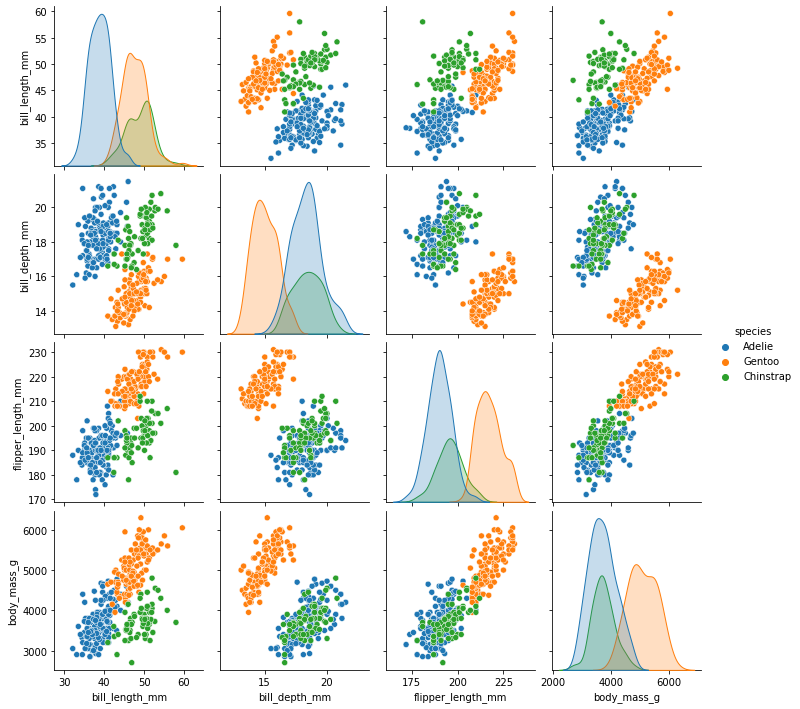

In [4]:
sns.pairplot(penguins.drop("year", axis=1), hue='species');

In [5]:
import umap

In [6]:
reducer = umap.UMAP()

In [7]:
penguin_data = penguins[
    [
        "bill_length_mm",
        "bill_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)

In [8]:
embedding = reducer.fit_transform(scaled_penguin_data)
embedding.shape

(333, 2)

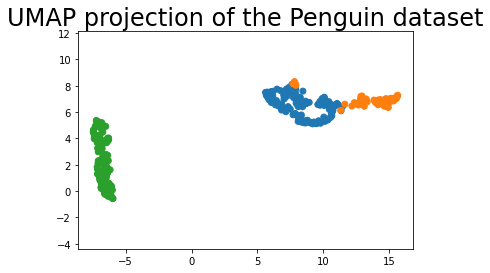

In [9]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24);

In [10]:
pam50 = pd.read_csv("/home/selen/Documents/BioInfo_Master/dea/Data_Pam50.csv")
pam50.head()

,Unnamed: 0,subtype,ACTR3B,ANLN,BAG1,BCL2,BIRC5,BLVRA,CCNB1,CCNE1,...,PGR,PHGDH,PTTG1,RRM2,SFRP1,SLC39A6,TMEM45B,TYMS,UBE2C,UBE2T
0,Normal.Breast.10,Normal,-1.151,-3.736,0.260,1.300,-2.860,-0.569,-2.981,-1.962,...,0.794,-1.027,-2.650,-3.928,3.106,-1.138,-2.093,-4.36,-1.448,-3.382
1,Normal.Breast.2,Normal,-0.485,-3.739,0.591,1.580,-3.250,-0.533,-2.935,-1.086,...,1.386,-0.988,-2.386,-4.659,3.669,0.048,-0.933,-4.05,-2.615,-2.746
2,Normal.Breast.3,Normal,0.298,-2.848,0.359,1.292,-2.493,-0.687,-2.810,-1.194,...,0.428,-0.729,-1.658,-3.770,3.268,-0.796,-1.909,-2.86,-0.708,-2.744
3,Normal.Breast.4.Custom,Normal,1.153,-4.717,0.098,1.954,-3.237,-0.535,-3.558,-2.185,...,0.638,-0.543,-2.828,-4.536,3.350,-2.167,-3.274,-4.12,-2.065,-3.742
4,Normal.Breast.7,Normal,-0.287,-3.681,0.441,1.911,-2.156,-0.965,-2.869,-1.129,...,1.413,-1.070,-2.248,-3.798,3.175,-1.054,-0.597,-3.80,-1.847,-2.575


In [11]:
reducer2 = umap.UMAP()
pam50.drop('Unnamed: 0', inplace=True, axis=1)
subtypes = pam50['subtype']
pam50.drop('subtype', inplace=True, axis=1)

In [12]:
scaled__data = StandardScaler().fit_transform(pam50)

In [14]:
embedding = reducer.fit_transform(scaled__data)
embedding.shape

(72, 2)

In [15]:
couleurs = ["red","blue","orange","green","purple"]

In [16]:
c=[couleurs[x] for x in subtypes.map({"Normal":0, "Basal":1, "Her2":2, "LumA":3, "LumB":4})]

In [18]:
legend = {'red':'Normal', 'blue':'Basal', 'orange':'Her2', 'green':'LumA', 'purple':'LumB'}

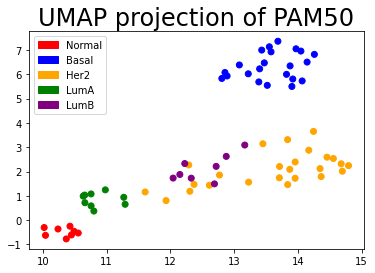

In [19]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots()

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=c)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

leg = []
for color in couleurs:
    patch = mpatches.Patch(color=color, label=legend[color])
    leg.append(patch)
plt.legend(handles=leg)


plt.title('UMAP projection of PAM50', fontsize=24);

plt.show()

In [21]:
#### data génération 

import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## random
X, y = datasets.make_regression(n_samples=200, n_features=5, n_informative=2, random_state=42)
df1 = pd.DataFrame(X)

## gaussian
gpr = datasets.make_gaussian_quantiles(n_features=5)
df2 = pd.DataFrame(gpr[0])

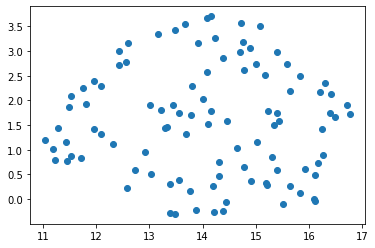

In [22]:
reducer2 = umap.UMAP()
scaled__data = StandardScaler().fit_transform(df2)
embedding = reducer.fit_transform(scaled__data)
embedding.shape
plt.scatter(
    embedding[:, 0],
    embedding[:, 1])

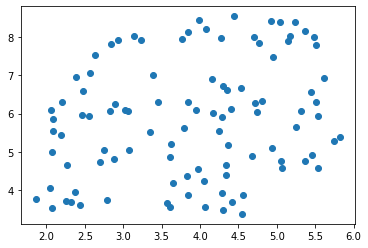

In [24]:
## avec modifications des paramètres
n_components = 2
metric = "euclidean"
reducer2 = umap.UMAP(
        n_neighbors=5,
        min_dist=0.2,
        n_components=n_components,
        metric=metric
        )
scaled__data = StandardScaler().fit_transform(df2)
embedding = reducer.fit_transform(scaled__data)
embedding.shape
plt.scatter(
    embedding[:, 0],
    embedding[:, 1])

In [ ]:
## explication prof
## ecrasement bord tsne, suppose guassien tout point
## 1/distance ideale caré

In [ ]:
## objectifs

# 2 metrics *4 min *6 n voisins *5 colums *4 lignes *20 repet = 19000

In [1]:
import rpy2
%load_ext rpy2.ipython

In [3]:
%%R -i df -w 5 -h 5 --units in -r 200

library(coRanking)

NameError: name 'df' is not defined.

In [ ]:
reducer2 = umap.UMAP()
scaled__data = StandardScaler().fit_transform(df2)
embedding = reducer.fit_transform(scaled__data)
embedding.shape
plt.scatter(
    embedding[:, 0],
    embedding[:, 1])